In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm


In [123]:
# Parameters
initial_temperature = 100
cooling = 0.95  
x_upper_bound = 10
x_lower_bound = -10
y_upper_bound = 10
y_lower_bound = -10

def objective_function(solution):
    x,y,z = solution
    return x**2 + y**2 + z**2

def neighbour(x, y, z):
    #new_x = x + np.random.uniform(-5, 5)
    #new_y = y + np.random.uniform(-5, 5)
    new_x = x + np.random.randn()*5
    new_y = y + np.random.randn()*5
    new_z = z + np.random.randn()*5
    return new_x, new_y, new_z


def simulated_annealing(value):
    x = np.random.uniform(-10,10)
    y = np.random.uniform(-10,10)
    z = np.random.uniform(-10,10)
    best_x, best_y, best_z = x,y,z
    best_value = objective_function((best_x,best_y, best_z))
    current_temperature = initial_temperature
    #value = []
    i=1
    for i in range(1,10000):
    #while current_temperature > 0.1:
        new_x, new_y, new_z = neighbour(x, y, z)
        new_value = objective_function((new_x,new_y,new_z))
        delta_value = new_value - best_value
        
        if delta_value < 0:
            best_x, best_y, best_z, best_value = new_x, new_y, new_z, new_value
        elif np.random.random() < np.exp(-delta_value / current_temperature):
            best_x, best_y, best_z, best_value = new_x, new_y, new_z, new_value
            print('yes, iter {}'.format(i))
        
        #print(current_temperature,new_x,new_y,new_value,delta_value)
        value.append(best_value)
        current_temperature *= cooling
        #i = i+1

    return best_x, best_y, best_z, best_value, value
value=[]
simulated_annealing(value)

yes, iter 1
yes, iter 5
yes, iter 6
yes, iter 8
yes, iter 11
yes, iter 13
yes, iter 15
yes, iter 17
yes, iter 35
yes, iter 51


(-0.6412450066407933,
 0.003889149855469398,
 -0.18338423600356757,
 0.4448400620429615,
 [224.2708250754906,
  125.21375051474831,
  43.30172097036003,
  43.30172097036003,
  74.58592609477097,
  79.87555041236149,
  76.3752929277325,
  135.78991125121968,
  75.11134165888679,
  42.63349748839024,
  97.64860940091913,
  36.30594391850767,
  79.94525910570292,
  79.94525910570292,
  83.91407517365685,
  83.91407517365685,
  111.73579138395202,
  89.30787591460972,
  89.30787591460972,
  89.30787591460972,
  89.30787591460972,
  89.30787591460972,
  89.30787591460972,
  82.1645108425851,
  82.1645108425851,
  82.1645108425851,
  80.60763569647231,
  80.60763569647231,
  80.60763569647231,
  80.60763569647231,
  68.51600452205801,
  68.51600452205801,
  68.51600452205801,
  68.51600452205801,
  80.34904999974977,
  80.34904999974977,
  80.34904999974977,
  32.05528831906855,
  32.05528831906855,
  4.61708620787457,
  4.61708620787457,
  4.61708620787457,
  4.61708620787457,
  4.617086207

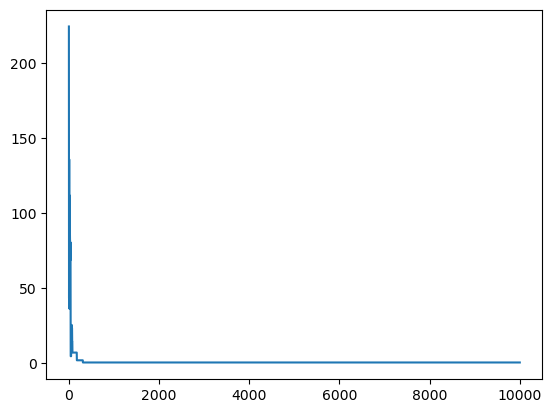

In [127]:
%matplotlib inline
plt.plot(value)
plt.show()

<IPython.core.display.Javascript object>


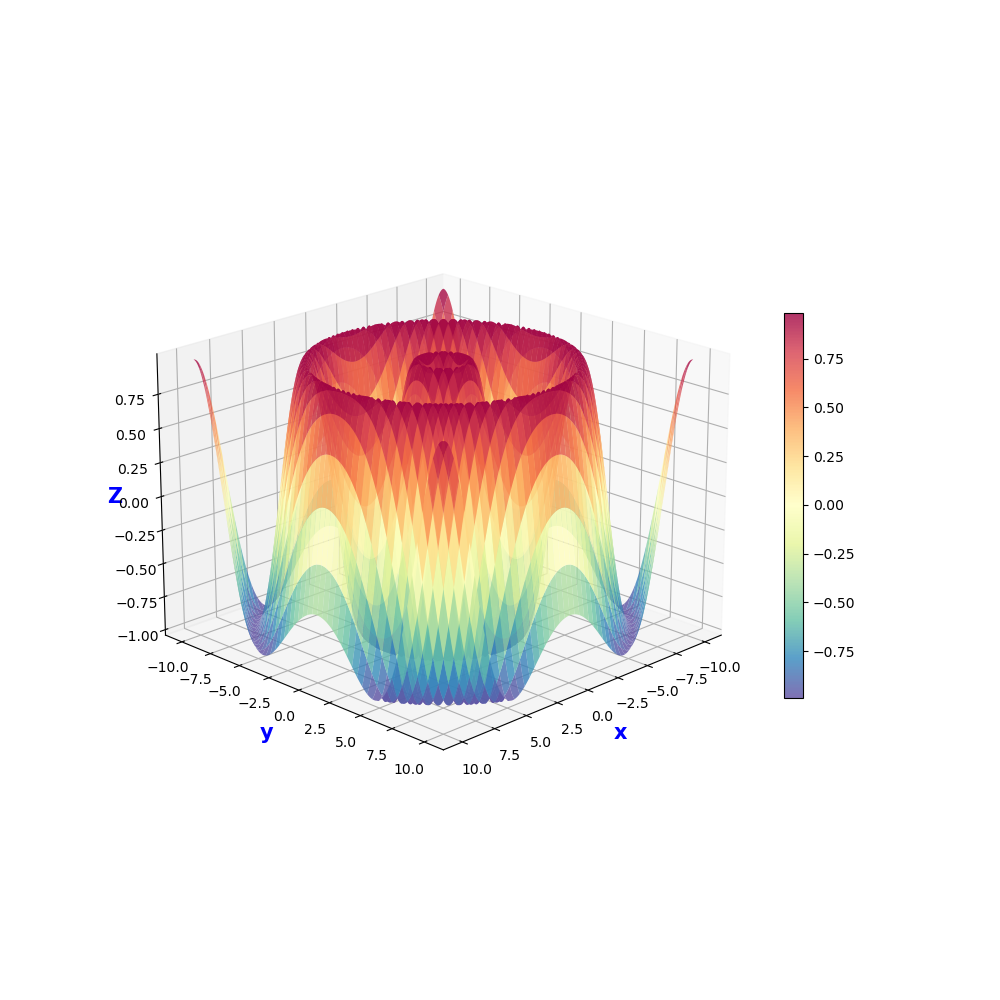

In [134]:
%matplotlib notebook
x = np.linspace(-10,10,num=1000,endpoint=True)
y = np.linspace(-10,10,num=1000,endpoint=True)
X,Y =np.meshgrid(x,y)

#Z = X**2 + Y**2
Z = np.sin(np.sqrt(X**2 + Y**2))
#Z = X**4 + Y**4

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='Spectral_r',alpha=0.8,antialiased=True)

# Customize the Plot
font1 = {'size':15,'weight':'bold','color':'blue'}
ax.set_xlabel('x',fontdict=font1)
ax.set_ylabel('y',fontdict=font1)
ax.set_zlabel('Z',fontdict=font1,labelpad=-2)
fig.colorbar(surf, shrink=0.5)
ax.view_init(elev=20, azim=45)

# Show or Save the Plot
plt.show()

In [29]:
Z.min()

0.00020040060080100106

In [30]:
np.where(Z==Z.min())

(array([499, 499, 500, 500]), array([499, 500, 499, 500]))

In [31]:
x[np.where(Z==Z.min())[0]]

array([-0.01001001, -0.01001001,  0.01001001,  0.01001001])

In [32]:
y[np.where(Z==Z.min())[1]]

array([-0.01001001,  0.01001001, -0.01001001,  0.01001001])

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

# Parameters
initial_temperature = 100
cooling = 0.95  
x_upper_bound = 1
x_lower_bound = 0
y_upper_bound = 1
y_lower_bound = 0
epsilon = 0.01  # small value to exclude exact boundary values

def objective_function(solution, a, b):
    x, y = solution
    return -((2.18**2 + b**2)+(2.18 - 2.18**2)*x+(a - b**2)*y**2 + 
             (a - b**2)*(x-y)**2)+((1.0 - x)*np.log((1.0 - x)/10.0)+
             y * np.log(y) + (x - y) * np.log(x - y) + 
             (2.18**2 * (1.0 - x) + b**2 * (1.0 - y**2 - (x - y)**2)) / 2.0)

# Update the neighbour generation to ensure it's within the new bounds and x > y
def neighbour(x, y):
    #new_x = x + np.random.uniform(-1,1)
    new_x = x + np.random.randn()*0.5
    new_x = min(max(new_x, x_lower_bound + epsilon), x_upper_bound - epsilon)
    
    #new_y = y + np.random.uniform(-1, 1)
    new_y = np.random.randn()*0.5
    new_y = min(max(new_y, y_lower_bound + epsilon), new_x - epsilon)  # Ensure y < x

    return new_x, new_y

# Simulated Annealing function
def simulated_annealing(a, b,value):
    x = np.random.uniform(x_lower_bound + epsilon, x_upper_bound - epsilon)
    y = np.random.uniform(y_lower_bound + epsilon, min(x - epsilon, y_upper_bound - epsilon))
    best_x, best_y = x,y
    best_value = objective_function((best_x,best_y),a,b)
    current_temperature = initial_temperature
    
    i=1
    for i in range(1,20000):
    #while current_temperature > 0.1:
        new_x, new_y = neighbour(x, y)
        new_value = objective_function((new_x,new_y),a,b)
        delta_value = new_value - best_value
        
        if delta_value < 0:
            best_x, best_y, best_value = new_x, new_y, new_value
        elif np.random.random() < np.exp(-delta_value / current_temperature):
            best_x, best_y, best_value = new_x, new_y, new_value
            print('yes, iter {}'.format(i))
        
        #print(current_temperature,new_x,new_y,new_value,delta_value)
        value.append(best_value)
        current_temperature *= cooling

    return best_x, best_y, best_value, value

value=[]
simulated_annealing(2.8,0,value)

yes, iter 3
yes, iter 4
yes, iter 6
yes, iter 8
yes, iter 11
yes, iter 17
yes, iter 18
yes, iter 20
yes, iter 21
yes, iter 23
yes, iter 27
yes, iter 28
yes, iter 30
yes, iter 33
yes, iter 37
yes, iter 39
yes, iter 41
yes, iter 42
yes, iter 44
yes, iter 45
yes, iter 46
yes, iter 48
yes, iter 49
yes, iter 52
yes, iter 54
yes, iter 56
yes, iter 59
yes, iter 62
yes, iter 68
yes, iter 70
yes, iter 73
yes, iter 76
yes, iter 80
yes, iter 82
yes, iter 85
yes, iter 86
yes, iter 88
yes, iter 89
yes, iter 91
yes, iter 93
yes, iter 95
yes, iter 96
yes, iter 99
yes, iter 109
yes, iter 114
yes, iter 115
yes, iter 117
yes, iter 118
yes, iter 120
yes, iter 122
yes, iter 124
yes, iter 125
yes, iter 130
yes, iter 135
yes, iter 145
yes, iter 153
yes, iter 157
yes, iter 158


/tmp/ipykernel_4051277/2554415285.py:20: RuntimeWarning: divide by zero encountered in log
  y * np.log(y) + (x - y) * np.log(x - y) +
/tmp/ipykernel_4051277/2554415285.py:20: RuntimeWarning: invalid value encountered in scalar multiply
  y * np.log(y) + (x - y) * np.log(x - y) +
/tmp/ipykernel_4051277/2554415285.py:52: RuntimeWarning: overflow encountered in scalar divide
  elif np.random.random() < np.exp(-delta_value / current_temperature):


(0.9374295161763108,
 0.01,
 -5.034316140004188,
 [-4.864251392566927,
  -5.006289907820871,
  -4.888581694358793,
  -4.649862054305795,
  -5.006289907820871,
  -4.575908404378332,
  -4.977606869991652,
  -4.478107625755276,
  -5.006289907820871,
  -5.006289907820871,
  -4.75869900189632,
  -4.75869900189632,
  -4.848276118397019,
  -4.972908496463789,
  -4.972908496463789,
  -4.986620657942257,
  -4.854651977330641,
  -4.7312301222490944,
  -4.820470467456086,
  -4.819589345498615,
  -4.3943782987285225,
  -5.017976972151561,
  -4.882264462759394,
  -4.882264462759394,
  -5.006289907820871,
  -5.006289907820871,
  -4.814647116947395,
  -4.801935962233469,
  -4.83401423566434,
  -4.792198163563077,
  -4.792198163563077,
  -4.850952784546615,
  -4.8204711171108565,
  -4.852312333325264,
  -4.954107752438864,
  -4.984739912455697,
  -4.856044974755828,
  -5.006289907820871,
  -4.942192593054959,
  -4.942192593054959,
  -4.820894743411071,
  -4.819588672457742,
  -5.034065627946138,
  -5.

In [141]:
%matplotlib inline
plt.plot(value)
plt.show()

TypeError: Axes3D.plot() missing 1 required positional argument: 'ys'

In [94]:
best_z

NameError: name 'best_z' is not defined

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

# Parameters
initial_temperature = 100
cooling = 0.95  
x_upper_bound = 1
x_lower_bound = 0
y_upper_bound = 1
y_lower_bound = 0
epsilon = 0.01  # small value to exclude exact boundary values

def objective_function(solution, a, b):
    x, y = solution
    return -((2.18**2 + b**2)+(2.18 - 2.18**2)*x+(a - b**2)*y**2 + 
             (a - b**2)*(x-y)**2)+((1.0 - x)*np.log((1.0 - x)/10.0)+
             y * np.log(y) + (x - y) * np.log(x - y) + 
             (2.18**2 * (1.0 - x) + b**2 * (1.0 - y**2 - (x - y)**2)) / 2.0)

# Update the neighbour generation to ensure it's within the new bounds and x > y
def neighbour(x, y):
    #new_x = x + np.random.uniform(-1, 1)
    new_x = x + np.random.randn()*0.5
    new_x = min(max(new_x, x_lower_bound + epsilon), x_upper_bound - epsilon)
    
    #new_y = y + np.random.uniform(-1, 1)
    new_y = y + np.random.randn()*0.5
    new_y = min(max(new_y, y_lower_bound + epsilon), new_x - epsilon)  # Ensure y < x

    return new_x, new_y

# Simulated Annealing function
def simulated_annealing(a, b):
    x = np.random.uniform(x_lower_bound + epsilon, x_upper_bound - epsilon)
    y = np.random.uniform(y_lower_bound + epsilon, min(x - epsilon, y_upper_bound - epsilon))
    best_x, best_y = x,y
    best_value = objective_function((best_x,best_y),a,b)
    current_temperature = initial_temperature
    
    for i in range(1,2000):
    #while current_temperature > 0.1:
        new_x, new_y = neighbour(x, y)
        new_value = objective_function((new_x,new_y),a,b)
        delta_value = new_value - best_value
        
        if delta_value < 0:
            best_x, best_y, best_value = new_x, new_y, new_value
        elif np.random.random() < np.exp(-delta_value / current_temperature):
            best_x, best_y, best_value = new_x, new_y, new_value
        
        #print(current_temperature,new_x,new_y,new_value,delta_value)
        current_temperature *= cooling

    return best_x, best_y, best_value

# Loop over a and b values and run Simulated Annealing for each case again with updated bounds
a_values = np.linspace(0, 5, 100,endpoint=True)
b_values = np.linspace(0, 2.5, 100,endpoint=True)

best_x_list=[]
best_y_list=[]
best_value_list=[]
a_list = []
b_list = []

for a in tqdm(a_values):
    for b in b_values:
        best_x, best_y, best_value = simulated_annealing(a, b)
        best_x_list.append(best_x)
        best_y_list.append(best_y)
        best_value_list.append(best_value)
        a_list.append(a)
        b_list.append(b)


  0%|                                                                                                                                           | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_4051277/524267933.py:20: RuntimeWarning: divide by zero encountered in log
  y * np.log(y) + (x - y) * np.log(x - y) +
/tmp/ipykernel_4051277/524267933.py:20: RuntimeWarning: invalid value encountered in scalar multiply
  y * np.log(y) + (x - y) * np.log(x - y) +
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:50<00:00,  1.11s/it]


In [253]:
a_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.050505

In [61]:
df2 = pd.DataFrame(a_list,columns=['a'])
df2['b'] = pd.DataFrame(b_list,columns=['b'])
df2['best_x'] = pd.DataFrame(best_x_list,columns=['best_x'])
df2['best_y'] = pd.DataFrame(best_y_list,columns=['best_y'])
df2['best_value'] = pd.DataFrame(best_value_list,columns=['best_value'])
df2

,a,b,best_x,best_y,best_value
0,0.0,0.000000,0.133462,0.067538,-4.830707
1,0.0,0.025253,0.153402,0.066541,-4.829327
2,0.0,0.050505,0.106603,0.050109,-4.826729
3,0.0,0.075758,0.137654,0.067747,-4.833739
4,0.0,0.101010,0.184297,0.105216,-4.827012
...,...,...,...,...,...
9995,5.0,2.398990,0.230300,0.118284,-7.736403
9996,5.0,2.424242,0.220949,0.108667,-7.796717
9997,5.0,2.449495,0.223521,0.097900,-7.855535
9998,5.0,2.474747,0.216002,0.115308,-7.917671


In [62]:
Z2 = np.reshape(df2['best_value'].values,(100,100))
Z2

array([[-4.8307065 , -4.829327  , -4.82672909, ..., -7.80815963,
        -7.84759208, -7.92844609],
       [-4.83074452, -4.83170811, -4.83210162, ..., -7.80855487,
        -7.85476921, -7.93201178],
       [-4.82969676, -4.82544855, -4.83307228, ..., -7.79791488,
        -7.85964959, -7.90032913],
       ...,
       [-7.02236971, -7.0223823 , -7.02242008, ..., -7.85620416,
        -7.9160486 , -7.97883757],
       [-7.07087981, -7.0708924 , -7.07093018, ..., -7.85497369,
        -7.91609377, -7.9787982 ],
       [-7.11938991, -7.1194025 , -7.11944029, ..., -7.85553472,
        -7.91767063, -7.98054484]])

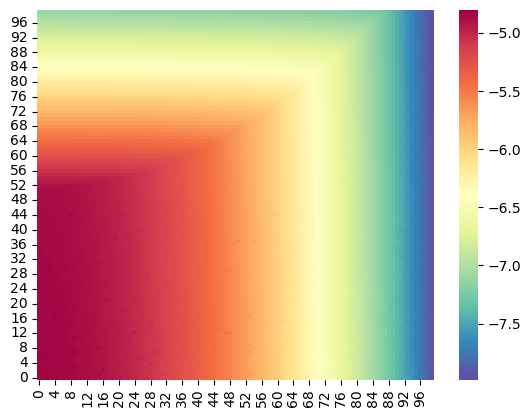

In [63]:
ax = sns.heatmap(Z2,cmap='Spectral_r')
ax.invert_yaxis()

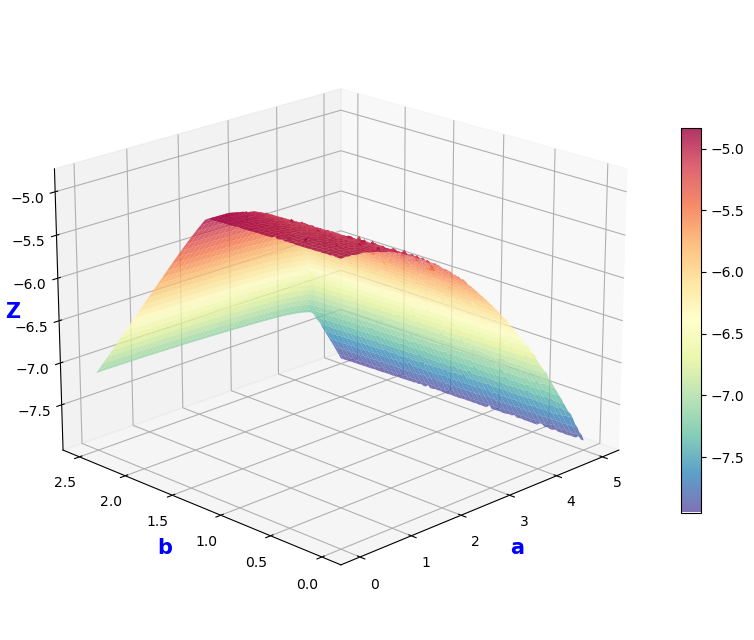

In [64]:
a_grid,b_grid = np.meshgrid(a_values,b_values)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(a_grid, b_grid, Z2, cmap='Spectral_r',alpha=0.8)

# Customize the Plot
font1 = {'size':15,'weight':'bold','color':'blue'}
ax.set_xlabel('a',fontdict=font1)
ax.set_ylabel('b',fontdict=font1)
ax.set_zlabel('Z',fontdict=font1,labelpad=-2)
fig.colorbar(surf, shrink=0.5)
ax.view_init(elev=20, azim=45)
ax.invert_yaxis()
ax.invert_xaxis()
# Show or Save the Plot
plt.show()

In [418]:
df2[df2['best_value']>0]

,a,b,best_x,best_y,best_value


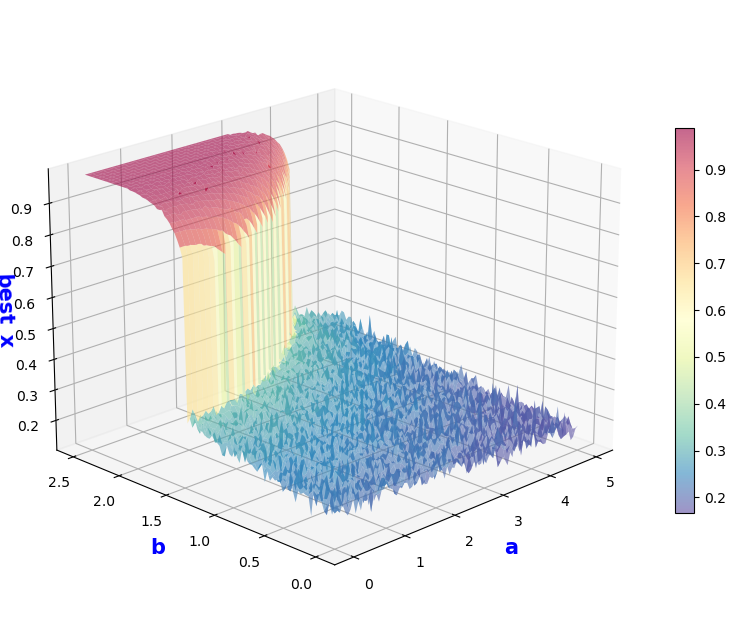

In [53]:
a_grid,b_grid = np.meshgrid(a_values,b_values)
best_x_grid = np.reshape(df2['best_x'].values,(100,100))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(a_grid, b_grid, best_x_grid, cmap='Spectral_r',alpha=0.6)

# Customize the Plot
font1 = {'size':15,'weight':'bold','color':'blue'}
ax.set_xlabel('a',fontdict=font1)
ax.set_ylabel('b',fontdict=font1)
ax.set_zlabel('best_x',fontdict=font1,labelpad=-0.5)
fig.colorbar(surf, shrink=0.5)
ax.view_init(elev=20, azim=45)
ax.invert_yaxis()
ax.invert_xaxis()

# Show or Save the Plot
plt.show()

In [54]:
df2[(0.8<=df2['a'])&(df2['a']<1)]

,a,b,best_x,best_y,best_value
1600,0.808081,0.000000,0.229395,0.115240,-5.162125
1601,0.808081,0.025253,0.234664,0.120942,-5.162556
1602,0.808081,0.050505,0.232476,0.109294,-5.163184
1603,0.808081,0.075758,0.230533,0.115673,-5.164986
1604,0.808081,0.101010,0.250853,0.126702,-5.166363
...,...,...,...,...,...
1995,0.959596,2.398990,0.195823,0.104198,-7.979301
1996,0.959596,2.424242,0.201969,0.094579,-8.037846
1997,0.959596,2.449495,0.192688,0.090458,-8.099886
1998,0.959596,2.474747,0.199624,0.095306,-8.159880


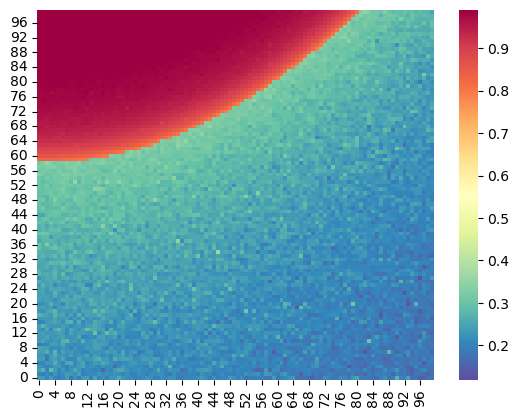

In [55]:
ax = sns.heatmap(best_x_grid,cmap='Spectral_r')
ax.invert_yaxis()
#plt.xticks(ticks=np.linspace(0,100,25,endpoint=True),labels=np.linspace(0,0.5,num=25,endpoint=True))

array([6.4, 4.8])

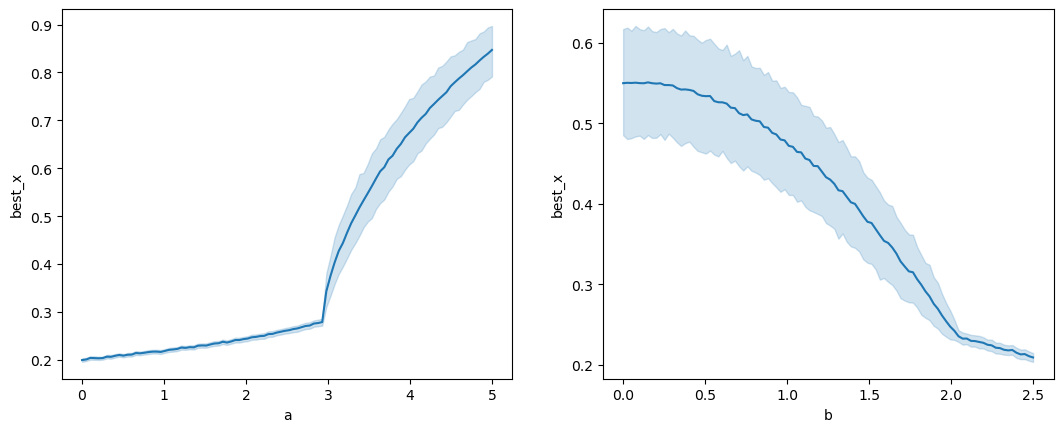

<Figure size 640x480 with 0 Axes>

In [441]:
plt.figure(figsize=(12.8,4.8))
plt.subplot(121)
sns.lineplot(x=df2['a'],y=df2['best_x'])
plt.subplot(122)
sns.lineplot(x=df2['b'],y=df2['best_x'])
plt.figure().get_size_inches()

In [65]:
trans_rows = []
j=0
for i in range(1,df2.shape[0]):
    if abs(df2['best_x'][i] - df2['best_x'][i-1]) >=0.45:
        j= j+1
        if j==1: 
            trans_rows.append(i)
        elif(j>1) & (df2['b'][i-1]!=2.5):
            trans_rows.append(i-1)

In [66]:
trans_rows

[5200,
 5209,
 5315,
 5420,
 5523,
 5626,
 5729,
 5832,
 5934,
 6036,
 6138,
 6240,
 6342,
 6444,
 6546,
 6647,
 6749,
 6851,
 6952,
 7054,
 7155,
 7256,
 7358,
 7459,
 7560,
 7662,
 7763,
 7864,
 7965,
 8067,
 8168,
 8269,
 8370,
 8471,
 8572,
 8673,
 8774,
 8876,
 8977,
 9078,
 9179,
 9280,
 9381,
 9482,
 9582,
 9683,
 9784,
 9885,
 9986]

In [67]:
df_trans = df2.loc[trans_rows].copy()
df_trans

,a,b,best_x,best_y,best_value
5200,2.626263,0.000000,0.898385,0.010000,-4.890438
5209,2.626263,0.227273,0.891294,0.881294,-4.896070
5315,2.676768,0.378788,0.889116,0.010000,-4.945538
5420,2.727273,0.505051,0.892039,0.010000,-4.997228
5523,2.777778,0.580808,0.891266,0.881266,-5.045649
5626,2.828283,0.656566,0.894745,0.010000,-5.095359
5729,2.878788,0.732323,0.893419,0.010000,-5.146327
5832,2.929293,0.808081,0.890937,0.010000,-5.198574
5934,2.979798,0.858586,0.893621,0.010000,-5.247211
6036,3.030303,0.909091,0.894725,0.010000,-5.296438


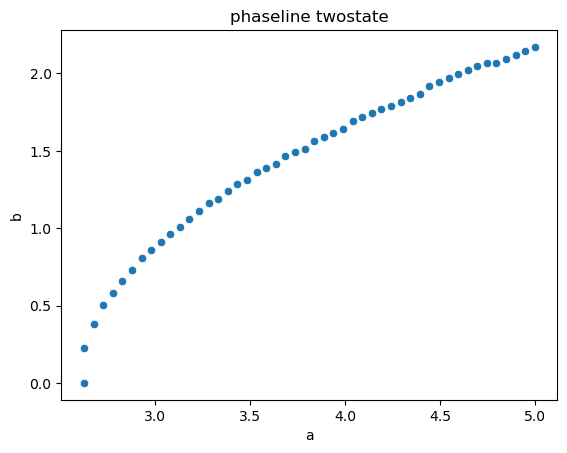

In [68]:
sns.scatterplot(x=df_trans['a'],y=df_trans['b'])
plt.title('phaseline twostate')
plt.savefig('a_vs_b_transition.png',dpi=1200)

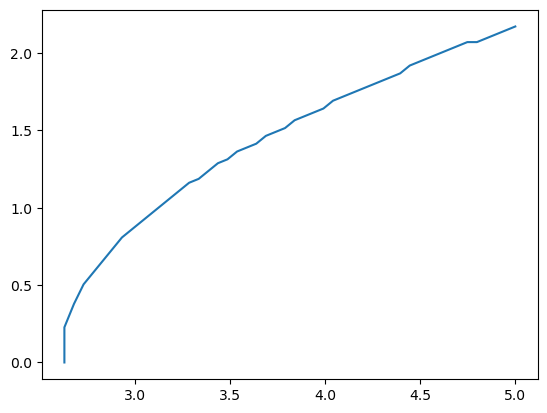

In [69]:
plt.plot(df_trans['a'],df_trans['b'])

In [266]:
df2['best_x'][1]

0.23863396325361508

In [215]:
best_x_grid

array([[0.2279983 , 0.21354879, 0.20951117, ..., 0.1736863 , 0.18529361,
        0.19997624],
       [0.21172063, 0.21445854, 0.23417089, ..., 0.1858949 , 0.16595815,
        0.16753535],
       [0.21251792, 0.2181191 , 0.23673627, ..., 0.17278856, 0.16926685,
        0.16854732],
       ...,
       [0.99      , 0.99      , 0.99      , ..., 0.27852243, 0.26993802,
        0.25468108],
       [0.99      , 0.99      , 0.99      , ..., 0.27269689, 0.25720786,
        0.28440811],
       [0.99      , 0.99      , 0.99      , ..., 0.28637905, 0.27871885,
        0.27130354]])

In [ ]:
best_x_grid

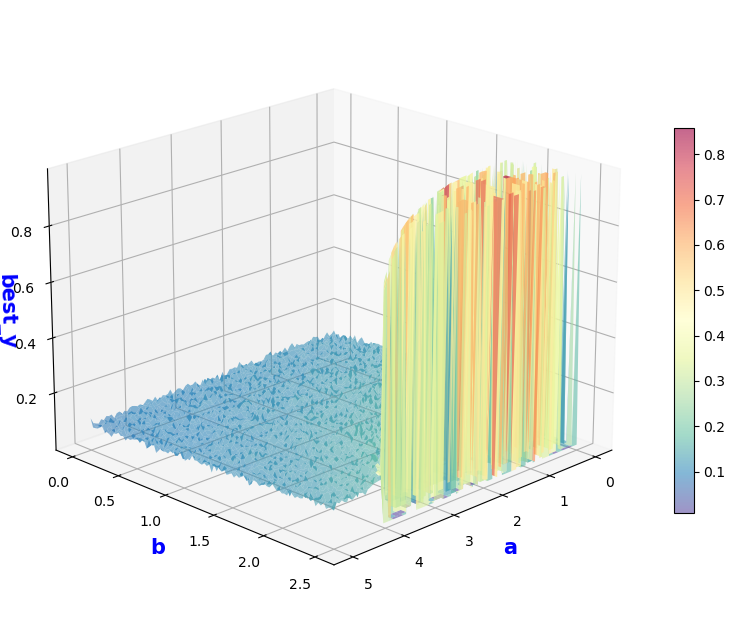

In [209]:
a_grid,b_grid = np.meshgrid(a_values,b_values)
best_y_grid = np.reshape(df2['best_y'].values,(100,100))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(a_grid, b_grid, best_y_grid, cmap='Spectral_r',alpha=0.6)

# Customize the Plot
font1 = {'size':15,'weight':'bold','color':'blue'}
ax.set_xlabel('a',fontdict=font1)
ax.set_ylabel('b',fontdict=font1)
ax.set_zlabel('best_y',fontdict=font1,labelpad=-2)
fig.colorbar(surf, shrink=0.5)
ax.view_init(elev=20, azim=45)

# Show or Save the Plot
plt.show()

In [300]:
df2.to_csv('annealing_result_final.csv',index=False,sep='\t')